In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-job-posting-on-glassdoor/Uncleaned_DS_jobs.csv
/kaggle/input/data-science-job-posting-on-glassdoor/Cleaned_DS_Jobs.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../input/data-science-job-posting-on-glassdoor/Cleaned_DS_Jobs.csv')
dfc = df.copy()
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,...,27,0,0,0,0,1,0,0,data scientist,senior
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,...,52,0,0,1,0,0,0,1,data scientist,na
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,...,39,1,1,0,0,1,0,0,data scientist,na
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,...,20,1,1,0,0,1,0,0,data scientist,na
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,...,22,1,1,0,0,0,0,0,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Data Scientist,105-167,Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,Company - Private,Advertising & Marketing,...,31,1,1,1,0,0,1,1,data scientist,na
656,Data Scientist,105-167,Job Description\nBecome a thought leader withi...,0.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,...,-1,0,0,0,0,0,0,0,data scientist,na
657,Data Scientist,105-167,Join a thriving company that is changing the w...,0.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,...,-1,1,1,1,0,0,1,0,data scientist,na
658,Data Scientist,105-167,100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,Company - Private,Advertising & Marketing,...,-1,1,0,1,1,0,0,1,data scientist,na


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary', 'job_state', 'same_state', 'company_age', 'python',
       'excel', 'hadoop', 'spark', 'aws', 'tableau', 'big_data', 'job_simp',
       'seniority'],
      dtype='object')

In [5]:
df.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Type of ownership     object
Industry              object
Sector                object
Revenue               object
min_salary             int64
max_salary             int64
avg_salary             int64
job_state             object
same_state             int64
company_age            int64
python                 int64
excel                  int64
hadoop                 int64
spark                  int64
aws                    int64
tableau                int64
big_data               int64
job_simp              object
seniority             object
dtype: object

In [6]:
df.describe()

,Rating,min_salary,max_salary,avg_salary,same_state,company_age,python,excel,hadoop,spark,aws,tableau,big_data
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,3.587424,99.296970,148.301515,123.612121,0.407576,29.736364,0.730303,0.440909,0.212121,0.281818,0.260606,0.184848,0.206061
std,1.183540,33.161485,48.264588,39.786698,0.491756,39.763033,0.444139,0.496873,0.409120,0.450226,0.439298,0.388469,0.404781
min,0.000000,31.000000,56.000000,43.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,79.000000,119.000000,103.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.800000,91.000000,133.000000,114.000000,0.000000,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.300000,122.000000,165.000000,136.000000,1.000000,37.250000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,5.000000,212.000000,331.000000,271.000000,1.000000,239.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df["Job Title"].unique()

array(['Sr Data Scientist', 'Data Scientist',
       'Data Scientist / Machine Learning Expert',
       'Staff Data Scientist - Analytics',
       'Data Scientist - Statistics, Early Career', 'Data Modeler',
       'Experienced Data Scientist', 'Data Analyst II',
       'Medical Lab Scientist', 'Data Scientist/Machine Learning',
       'Human Factors Scientist',
       'Business Intelligence Analyst I- Data Insights',
       'Data Scientist - Risk', 'Data Scientist-Human Resources',
       'Senior Research Statistician- Data Scientist', 'Data Engineer',
       'Associate Data Scientist', 'Business Intelligence Analyst',
       'Senior Analyst/Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Data Analyst I',
       'Scientist - Molecular Biology',
       'Computational Scientist, Machine Learning',
       'Senior Data Scientist', 'E-Commerce Data Analyst',
       'Data Analytics Engineer',
       'Product Data Scientist - Ads Data Science',
       'Data Scientist - 

In [8]:
df['job_simp'].unique()

array(['data scientist', 'na', 'analyst', 'data engineer', 'mle',
       'manager', 'director'], dtype=object)

In [9]:
df['job_simp'].value_counts()

data scientist    447
na                 68
analyst            55
data engineer      46
mle                34
manager             7
director            3
Name: job_simp, dtype: int64

In [10]:
print("number of NaN values for the column Job Title :", df['Job Title'].isnull().sum())
print("number of NaN values for the column Salary Estimate :", df['Salary Estimate'].isnull().sum())

number of NaN values for the column Job Title : 0
number of NaN values for the column Salary Estimate : 0


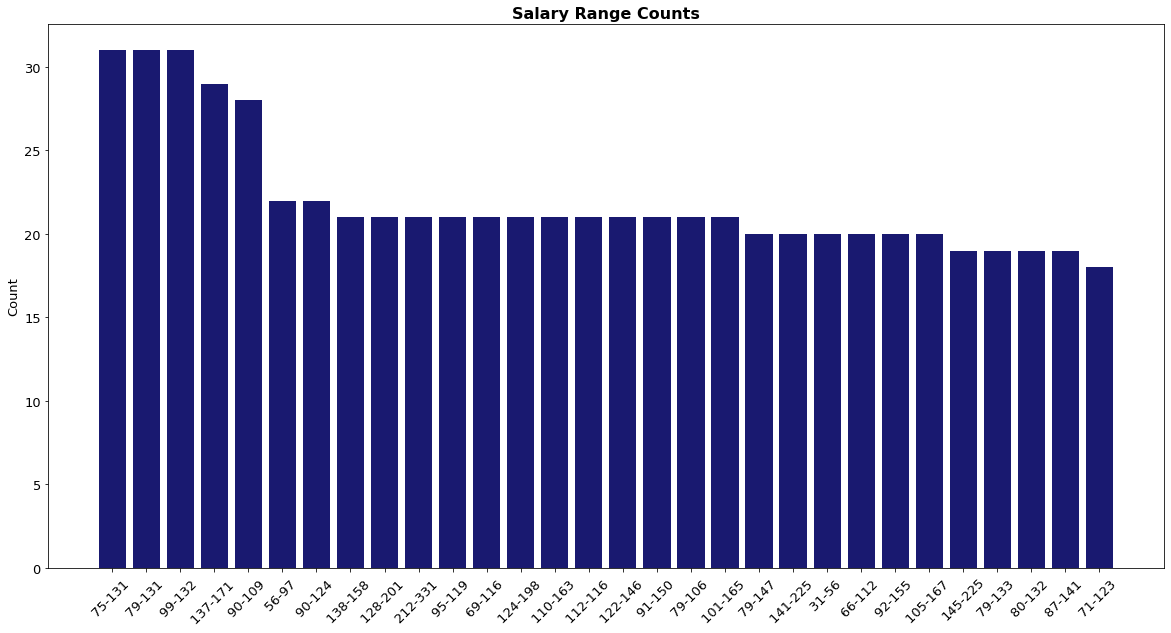

In [11]:
plt.figure(figsize=(20,10))
plt.bar(x=df['Salary Estimate'].value_counts().index, height=df['Salary Estimate'].value_counts(),
        color = 'midnightblue')
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.title("Salary Range Counts", fontsize=16, fontweight='bold')
plt.ylabel("Count", fontsize=13)
plt.show()

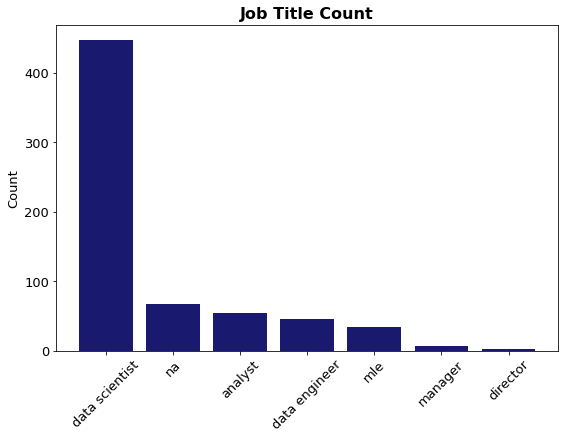

In [12]:
plt.figure(figsize=(9,6))
plt.bar(x=df.job_simp.value_counts().index, height=df.job_simp.value_counts(),
        color = 'midnightblue')
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.title("Job Title Count", fontsize=16, fontweight='bold')
plt.ylabel("Count", fontsize=13)
plt.show()

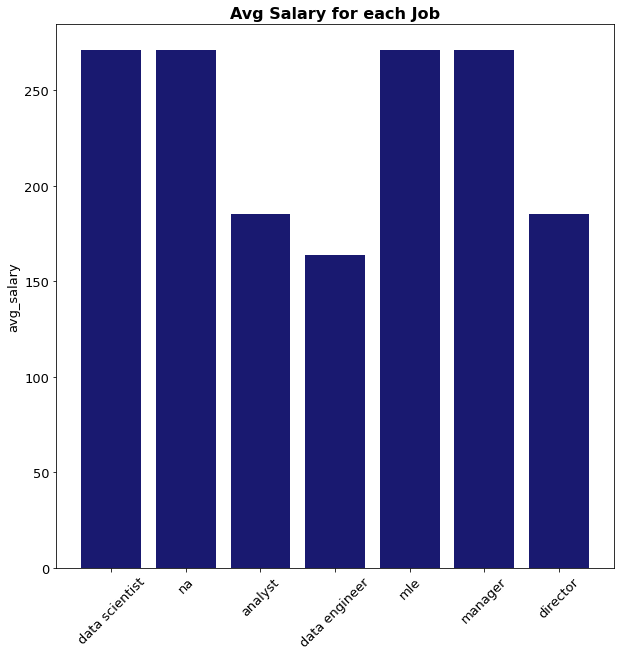

In [13]:
plt.figure(figsize=(10,10))
plt.bar(x=df['job_simp'], height=df['avg_salary'],
        color = 'midnightblue')
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.title("Avg Salary for each Job", fontsize=16, fontweight='bold')
plt.ylabel("avg_salary", fontsize=13)
plt.show()

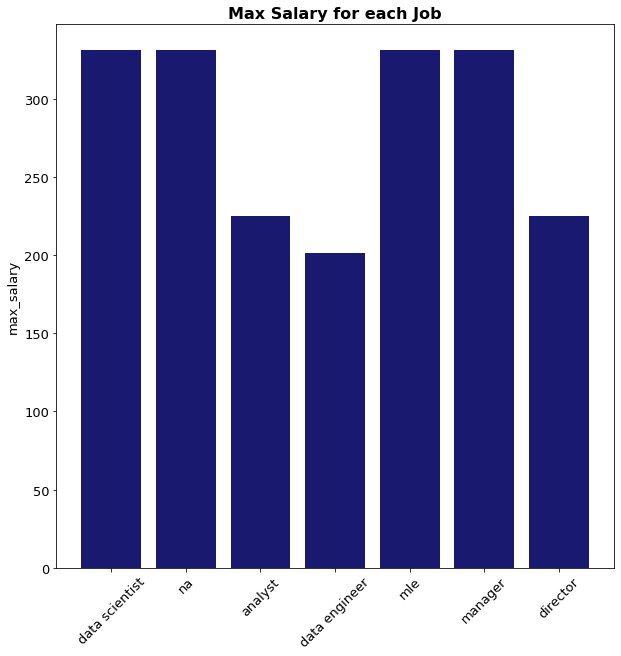

In [14]:
plt.figure(figsize=(10,10))
plt.bar(x=df['job_simp'], height=df['max_salary'],
        color = 'midnightblue')
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.title("Max Salary for each Job", fontsize=16, fontweight='bold')
plt.ylabel("max_salary", fontsize=13)
plt.show()

<AxesSubplot:>

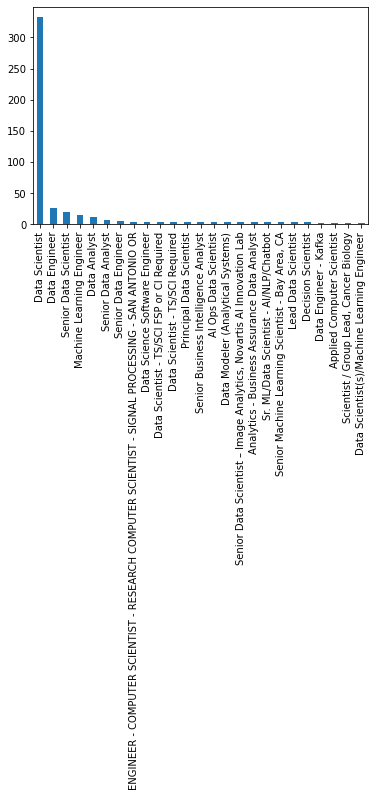

In [15]:
dfc['Job Title'].value_counts().head(25).plot.bar()

<AxesSubplot:>

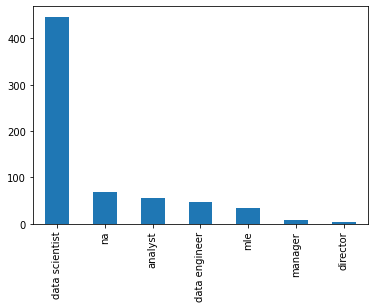

In [16]:
dfc['job_simp'].value_counts().head(25).plot.bar()

<AxesSubplot:>

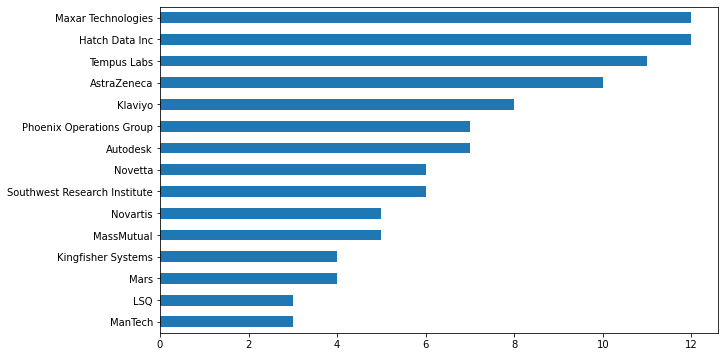

In [17]:
dfc['Company Name'].value_counts().head(15).sort_values().plot.barh(figsize = (10,6))

<AxesSubplot:>

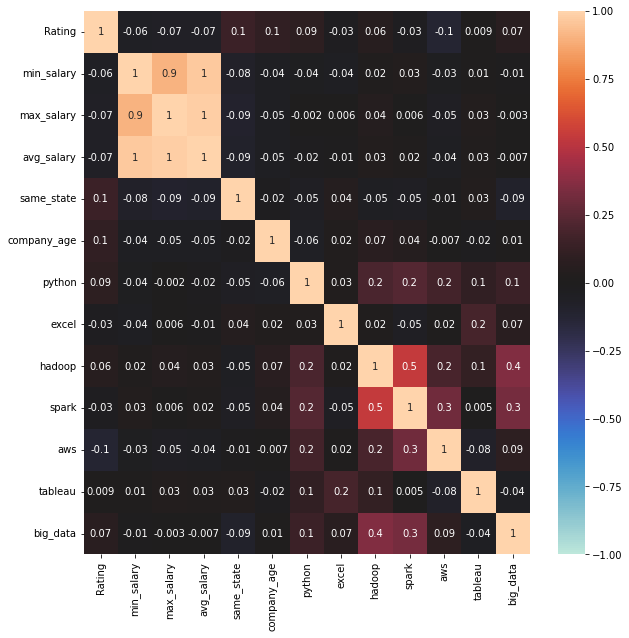

In [18]:
import numpy as np
fig, ax = plt.subplots(figsize=(10,10)) 
matrix = np.triu(df.corr())
sns.heatmap(df.corr(),annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0,  ax=ax)

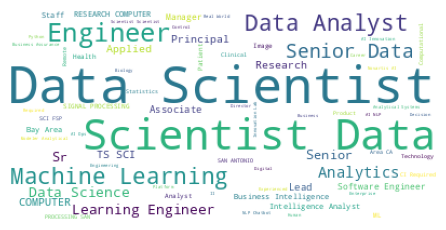

In [19]:
from wordcloud import WordCloud
positions_text = " ".join(dfc['Job Title'].dropna().to_list())
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(positions_text)
  
# plot the WordCloud image                        
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 